In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
lastdate=dt.datetime.strptime(session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0],'%Y-%m-%d')
query_date=lastdate-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
results_df=pd.DataFrame(results,columns=['Date','Precipitation']).set_index('Date')

# Sort the dataframe by date
results_df.sort_index(ascending=True,inplace=True)

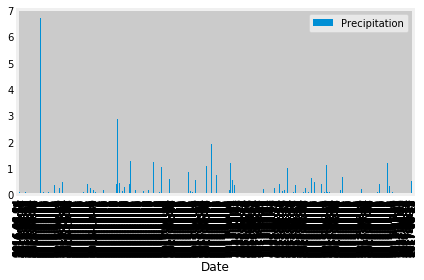

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot.bar()
plt.tight_layout()
plt.show()


![precipitation](Images/precipitation.png)

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(results_df.describe())

       Precipitation
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


![describe](Images/describe.png)

In [13]:
# Design a query to show how many stations are available in this dataset?
print(session.query(Measurement.station).\
    group_by(Measurement.station).count())

9


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

mostactive=session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

In [15]:
mostactive

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station==mostactive[0][0]).all()

[(54.0, 85.0, 71.66378066378067)]

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
mosttempobs=session.query(Measurement.station,func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()[0][0]

results_temp=session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.date > query_date).all()

In [18]:
temperature_df=pd.DataFrame(results_temp)
temperature_df

,date,tobs
0,2016-08-24,79.0
1,2016-08-25,80.0
2,2016-08-26,79.0
3,2016-08-27,77.0
4,2016-08-28,78.0
5,2016-08-29,78.0
6,2016-08-30,79.0
7,2016-08-31,80.0
8,2016-09-01,81.0
9,2016-09-02,80.0


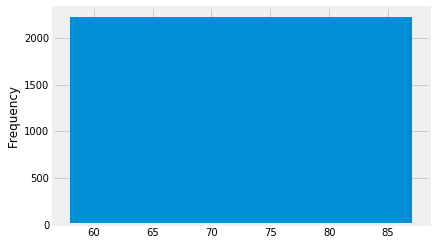

In [19]:
plt.hist(temperature_df['tobs'], bins=1)
plt.ylabel('Frequency')
plt.show()

![precipitation](Images/station-histogram.png)

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):

    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

#I want to go on a trip February 20 to February 26

calc_temps('2017-02-20', '2017-02-26')[0][1]

69.48837209302326

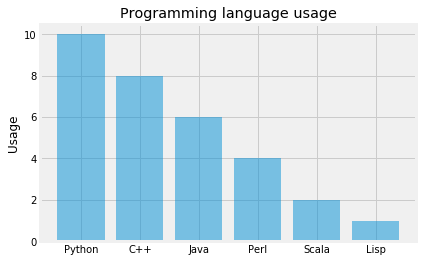

In [22]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
# x_pos = np.arange(1)

# fig, ax = plt.subplots()
# ax.bar(x=x_pos,height=calc_temps('2017-02-20', '2017-02-26')[0][1], yerr=calc_temps('2017-02-20', '2017-02-26')[0][2]-calc_temps('2017-02-20', '2017-02-26')[0][0])
# # ax.set_ylabel('Trip Avg Temp')
# # ax.set_xticks(x_pos)
# # ax.set_xticklabels(materials)
# ax.set_title('Trip Avg Temp')
# ax.yaxis.grid(True)

# # Save the figure and show
# plt.tight_layout()
# # plt.savefig('bar_plot_with_error_bars.png')
# plt.show()

objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

In [23]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [24]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [25]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [26]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [29]:
# Plot the daily normals as an area plot with `stacked=False`
session.query(Measurement.date).group_by(Measurement.date).all()

[('2010-01-01'),
 ('2010-01-02'),
 ('2010-01-03'),
 ('2010-01-04'),
 ('2010-01-05'),
 ('2010-01-06'),
 ('2010-01-07'),
 ('2010-01-08'),
 ('2010-01-09'),
 ('2010-01-10'),
 ('2010-01-11'),
 ('2010-01-12'),
 ('2010-01-13'),
 ('2010-01-14'),
 ('2010-01-15'),
 ('2010-01-16'),
 ('2010-01-17'),
 ('2010-01-18'),
 ('2010-01-19'),
 ('2010-01-20'),
 ('2010-01-21'),
 ('2010-01-22'),
 ('2010-01-23'),
 ('2010-01-24'),
 ('2010-01-25'),
 ('2010-01-26'),
 ('2010-01-27'),
 ('2010-01-28'),
 ('2010-01-29'),
 ('2010-01-30'),
 ('2010-01-31'),
 ('2010-02-01'),
 ('2010-02-02'),
 ('2010-02-03'),
 ('2010-02-04'),
 ('2010-02-05'),
 ('2010-02-06'),
 ('2010-02-07'),
 ('2010-02-08'),
 ('2010-02-09'),
 ('2010-02-10'),
 ('2010-02-11'),
 ('2010-02-12'),
 ('2010-02-13'),
 ('2010-02-14'),
 ('2010-02-15'),
 ('2010-02-16'),
 ('2010-02-17'),
 ('2010-02-18'),
 ('2010-02-19'),
 ('2010-02-20'),
 ('2010-02-21'),
 ('2010-02-22'),
 ('2010-02-23'),
 ('2010-02-24'),
 ('2010-02-25'),
 ('2010-02-26'),
 ('2010-02-27'),
 ('2010-02-28'